## Plan for Today

Learn all about training linear regression models!

1. I'll show how to train the linear model we discussed during the lecture.
1. We'll train a model with a second input feature.
1. Breakout rooms: You'll train models in small groups with input features of your choice.
    - Discuss your feature selection reasoning and model training results!

---

## Imports

If you haven't already, install scikit-learn via pip in your terminal:

`pip install scikit-learn`

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_percentage_error
)
from sklearn.linear_model import LinearRegression

---

## Steps of creating a Machine Learning Model

1. **Load and understand the Data:** Inspect, explore, and understand the features.
1. **Data Preprocessing**
    1. **Handle Missing Data:** Drop or impute missing values.
    1. **Handle Outliers:** Detect and handle extreme values.
    1. **Feature Engineering:** Transform, create, or encode new features.
1. **Split Data:** Create training and testing datasets.
1. **Train the Model:** Select and fit the model to the training data.
1. **Evaluate the Model:** Test the model and evaluate its performance.

---

## 1. Load and Explore Data

We did this before as part of the last practice session. This is just a short review of the exploration.

In [57]:
df_data = pd.read_csv("housing-datasets/data.csv")
df_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df_fields = pd.read_csv("housing-datasets/fields.csv")
df_fields

,name,description,type,category,is_target
0,id,Unique identifier.,int,meta,False
1,date,Date the house was sold.,str,temporal,False
2,price,The sale price.,float,outcome,True
3,bedrooms,Number of bedrooms.,int,property,False
4,bathrooms,Number of bathrooms.,float,property,False
5,sqft_living,Total interior living space (sqft).,int,property,False
6,sqft_lot,Total land area (sqft).,int,property,False
7,floors,Number of floors.,float,property,False
8,waterfront,A binary flag (1 if it has a waterfront view).,int,property,False
9,view,A rating from 0 to 4 of how good the view is.,int,quality,False


#### Basic exploration review

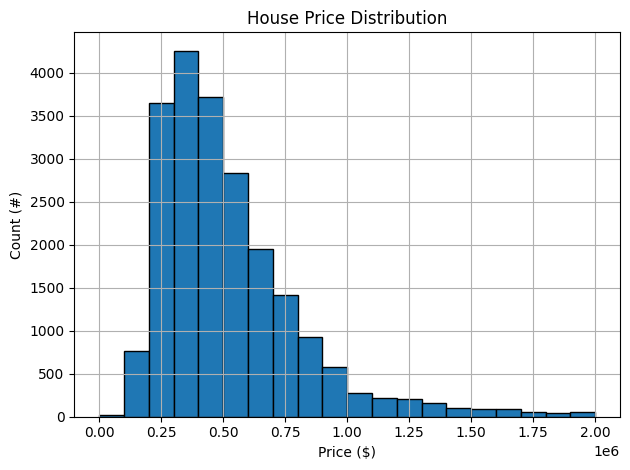

In [7]:
# Plot distribution of target variable (price)
df_data["price"].hist(bins=20, range=(0, 2e6), edgecolor="k")
plt.xlabel("Price ($)")
plt.ylabel("Count (#)")
plt.title("House Price Distribution")
plt.tight_layout()

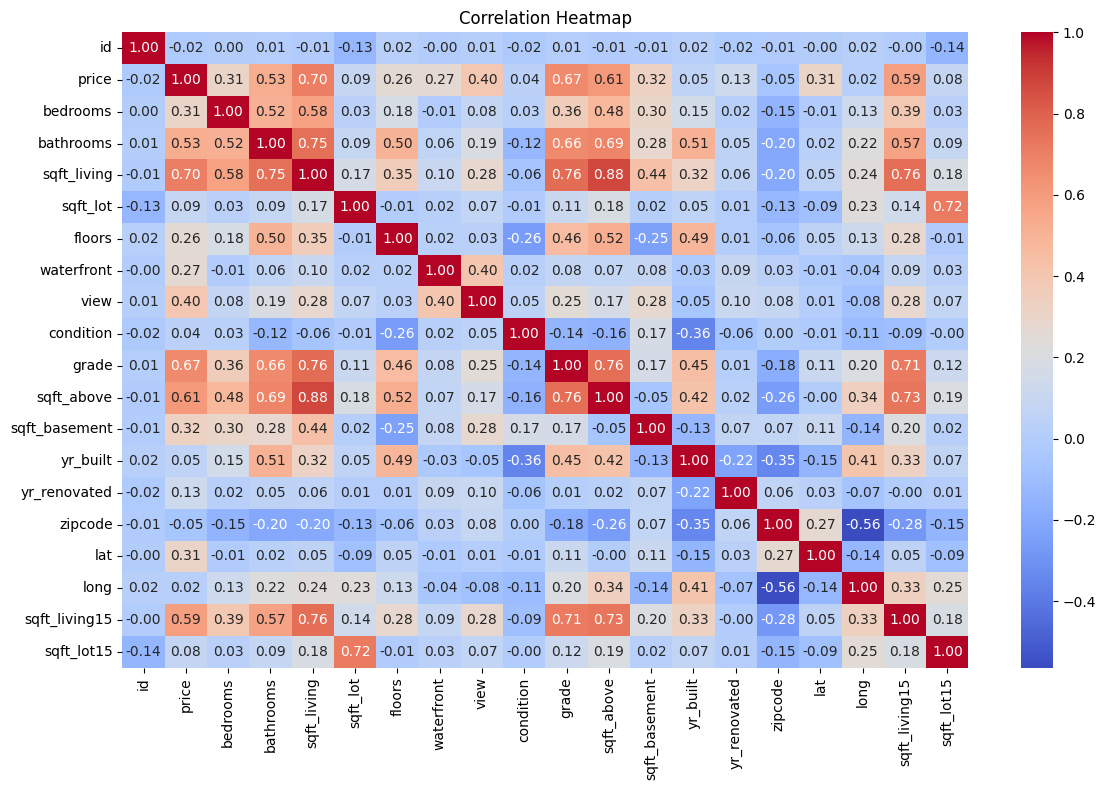

In [8]:
# Plot correlation heatmap
corr = df_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()

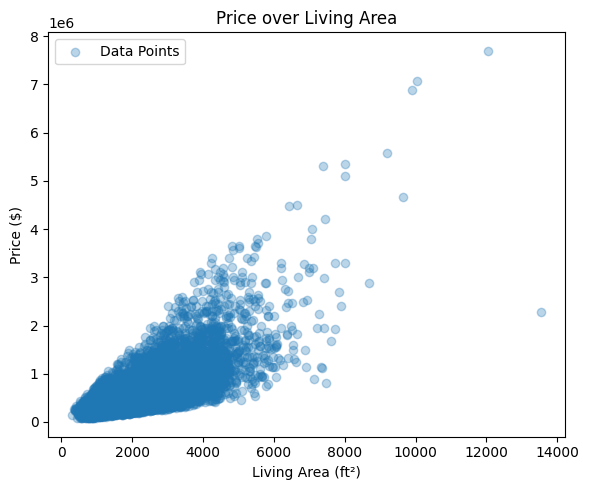

In [9]:
# Plot scatter for feature with strongest price correlation (living area)
plt.figure(figsize=(6, 5))
plt.scatter(df_data["sqft_living"], df_data["price"], alpha=0.3, edgecolor="C0", label="Data Points")
plt.xlabel("Living Area (ft²)")
plt.ylabel("Price ($)")
plt.title("Price over Living Area")
plt.legend()
plt.tight_layout()

---

## 2.1 Preprocessing

There are no major issues with the data that we need to fix so we'll skip this for now.

In [10]:
# df_data.info()

## 2.3 Feature Engineering --> Homework

We discussed possible new features during our last practice session.

- Engineer at least two new feature and add them to the data.
- Use them as new features for training models below.
- Can you engineer new features that improve your model accuracy?

In [11]:
# Your feature engineering code here:

# ...

df_data["my_new_feature"] = 1

In [12]:
df_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,my_new_feature
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


---

## 3. Split dataset

We split the dataset into *training* and *testing* data.

We use the training data (~80%) for training the model.

After training, we use the test data (remaining ~20%) to test our model on data points it hasn't seen yet.

This is a more objective measure of how accurate the model is and how well it generalizes to new data points.

In [13]:
df_train, df_test = train_test_split(df_data, test_size=0.2, random_state=42)

By default the `train_test_split` function also shuffles the data.

`random_state` allows us to always have the same shuffle outcome so that our results are reproducable and comparable among each other. It is the random seed that is used to shuffle the examples.

Shapes of the dataframes before and after the split:

In [14]:
print(f"{df_data.shape=}")
print(f"{df_train.shape=}")
print(f"{df_test.shape=}")

df_data.shape=(21613, 22)
df_train.shape=(17290, 22)
df_test.shape=(4323, 22)


---

## 4. Train Model

Select features and target:

In [15]:
# features = ["sqft_living"]  # Use list of column names to preserve dataframe
features = ["sqft_above"]  # Use list of column names to preserve dataframe
target = "price"

X_train = df_train[features]
y_train = df_train[target]

In [16]:
X_train.shape

(17290, 1)

In [17]:
X_train.head()

,sqft_above
6325,1780
13473,800
17614,990
16970,1280
20868,1446


In [18]:
y_train.shape

(17290,)

Instantiate and train the model:

In [19]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Remember, the equation for our linear model is:

$\text{Price} = w_1 * \text{Above} + w_0$

Inspect training results (best model parameters):

In [20]:
model.coef_

array([265.39434327])

In [21]:
model.intercept_

np.float64(63783.789497616235)

$Price = 279 * Area - 41999$

---

## 5. Evaluate Model

This is the real test of how well our model is doing on data it has not seen yet.

In [22]:
# Select features and targets from the test data
X_test = df_test[features]
y_test = df_test[target]

In [23]:
# Predict prices for test data
y_test_pred = model.predict(X_test)

In [24]:
df_test[features].head()

,sqft_above
735,2070
2830,1830
4106,3770
16218,4560
19964,2550


In [25]:
y_test_pred

array([ 613150.08006449,  549455.43767992, 1064320.46362182, ...,
        709753.62101441,  660921.06185291,  745847.251699  ],
      shape=(4323,))

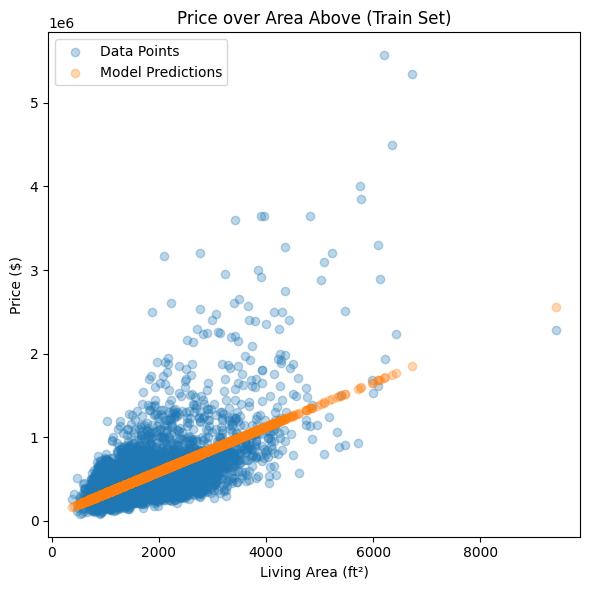

In [26]:
# Plot test data and model predictions
plt.figure(figsize=(6, 6))
plt.scatter(X_test, y_test, alpha=0.3, edgecolor="C0", label="Data Points")
plt.scatter(X_test, y_test_pred, alpha=0.3, edgecolor="C1", label="Model Predictions")
plt.xlabel("Living Area (ft²)")
plt.ylabel("Price ($)")
plt.title("Price over Area Above (Train Set)")
plt.legend()
plt.tight_layout()

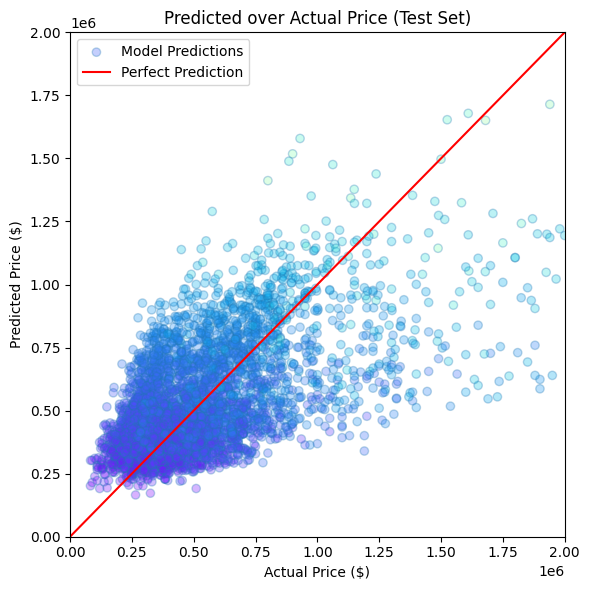

In [27]:
# Plot predicted over actual prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3, edgecolor="C0", label="Model Predictions", c=df_test["sqft_living"], cmap="rainbow")
plt.plot((0, 2e6), (0, 2e6), color="red", label="Perfect Prediction")
plt.xlim(0, 2e6)
plt.ylim(0, 2e6)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Predicted over Actual Price (Test Set)")
plt.legend()
plt.tight_layout()

#### Calculate loss statistics

In [28]:
# The squared loss that the model uses for training
mean_squared_error(y_test, y_test_pred)

94392651194.58461

In [29]:
# Taking the square root gives us the average error in $
root_mean_squared_error(y_test, y_test_pred)

307233.870519812

In [30]:
# MAPE is another loss function that gives us the average error as a percentage of the price
mean_absolute_percentage_error(y_test, y_test_pred) * 100

39.33977185586786

These numbers are now our benchmark of how good our current model is.

We can now think about how we can improve the model.

---

---

## Next Chapter: Multivariate Inputs

Let's see if we can improve our model by adding another feature!

Which one should we add next?

In [31]:
features = ["sqft_living", "sqft_above"]  # <--- Add new feature!
target = "price"

X_train = df_train[features]
y_train = df_train[target]

#### Instantiate and train the model

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Inspect training results (best model parameters):

In [33]:
# Note that we now have two coefficients!
model.coef_

array([296.49418369, -21.35790728])

In [34]:
model.intercept_

np.float64(-38985.31602011528)

#### Evaluate model

In [35]:
# Select features and targets from the test data
X_test = df_test[features]
y_test = df_test[target]

In [36]:
# Predict prices for test data
y_test_pred = model.predict(X_test)

#### Calculate loss statistics

In [37]:
# The loss that the model uses for training
mean_squared_error(y_test, y_test_pred)

76494711738.38521

In [38]:
# Taking the square root gives us the average error in $
root_mean_squared_error(y_test, y_test_pred)

276576.7736784584

In [39]:
# MAPE is another loss function that gives us the average error as a percentage of the price
mean_absolute_percentage_error(y_test, y_test_pred) * 100

35.71916341133895

#### Model Interpretation

Before, when we were using one feature, our model was a simple linear equation:

$\text{Price} = w_1 * \text{Feature}_1 + w_0 $

Since we are now using two features, the equation for our linear model becomes:

$\text{Price} = w_2 * \text{Feature}_2 + w_1 * \text{Feature}_1 + w_0 $

This means that we now did a *plane fit* instead of a *line fit*:

![Plane Fit](plane_fit.png)

When we add even more features, we are fitting a *hyperplane*. It is the same concept as a plane, just in higher dimensions.

---

## Multivariate Inputs (More Features)

**Your turn:** Add more features and try to find the best model that you can!

In [40]:
# Here is our menu - which variables do we want to use as features?
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21613 non-null  int64  
 1   date            21613 non-null  object 
 2   price           21613 non-null  float64
 3   bedrooms        21613 non-null  int64  
 4   bathrooms       21613 non-null  float64
 5   sqft_living     21613 non-null  int64  
 6   sqft_lot        21613 non-null  int64  
 7   floors          21613 non-null  float64
 8   waterfront      21613 non-null  int64  
 9   view            21613 non-null  int64  
 10  condition       21613 non-null  int64  
 11  grade           21613 non-null  int64  
 12  sqft_above      21613 non-null  int64  
 13  sqft_basement   21613 non-null  int64  
 14  yr_built        21613 non-null  int64  
 15  yr_renovated    21613 non-null  int64  
 16  zipcode         21613 non-null  int64  
 17  lat             21613 non-null 

In [41]:
# Your feature selection:
features = ["sqft_living", "bedrooms"]
target = "price"

X_train = df_train[features]
y_train = df_train[target]

We can do the same as we did before with two features:

- Instantiate and train the model
- Predict the prices in the test data
- Calculate the loss statistics and compare to previous models

You can repeat this cycle until you find a feature set that you are satisfied with.

Post your best model in chat! :-)

In [42]:
# Your code:

X_train.shape

(17290, 2)

In [43]:
X_train.head()

,sqft_living,bedrooms
6325,1780,3
13473,1000,2
17614,1080,3
16970,2090,3
20868,1741,2


In [44]:
y_train.shape

(17290,)

In [45]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
model.coef_

array([   312.15699349, -55228.54258621])

In [47]:
model.intercept_

np.float64(76404.26223480247)

In [48]:
# Select features and targets from the test data
X_test = df_test[features]
y_test = df_test[target]

In [49]:
y_test_pred = model.predict(X_test)

In [50]:
df_test[features].head()

,sqft_living,bedrooms
735,2070,4
2830,2900,5
4106,3770,4
16218,4560,3
19964,2550,3


In [51]:
y_test_pred

array([ 501655.0684114 ,  705516.83042075, 1032321.95734205, ...,
        615280.21404126,  557843.32723935,  657733.56515571],
      shape=(4323,))

In [52]:
mean_squared_error(y_test, y_test_pred)

74174783292.51218

In [53]:
root_mean_squared_error(y_test, y_test_pred)

272350.4787814998

In [54]:
mean_absolute_percentage_error(y_test, y_test_pred) * 100

34.79909378569279